<a href="https://colab.research.google.com/github/Chang365/ESAA-25-1-assignments/blob/main/ESAA_25_1_0505_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 05 회귀
## 01 회귀소개
- 회귀분석: 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법
- 여러개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법을 통칭
- 독립변수는 피처, 종속변수는 결정값
- 최적의 회귀계수를 찾아내는 것


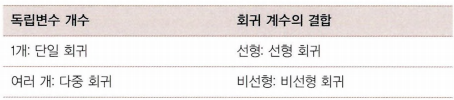

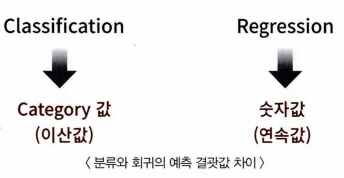

- 선형 회귀가 가장 많이 사용됨
- 선형회귀: 실제 값과 예측값의 차이(오류의 제곱 값)를 최소화하는 직선형 회귀선을 최적화하는 방식
- 선형 회귀 모델은 규제 방법에 따라 다시 별도의 유형으로 나뉨
- 규제: 회귀계수에 패널티 값을 적용하는 것


- 일반 선형 회귀: 예측값과 실제 값의 RSS 를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제를 적용하지 않은 모델
- 릿지: 릿지 회귀는 선형 회귀에 L2 규제를 추가한 회귀모델
- 라쏘: 선형회귀에 L1 규제를 적용한 방식.
- 엘라스틱: L2,L1 규제를 결합한 모델
- 로지스틱 회귀: 분류에 사용되는 선형 모델, 매우 강력한 분류 알고리즘



---

## 02 단순 선형 회귀를 통한 회귀 이해
- 단순선형회귀: 독립변수 1개, 종속변수 1개
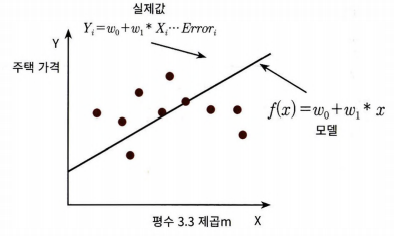

- 실제 닶과 회귀모델의 차이에 따른 오류 값을 남은 오류, 즉 잔차라고 부름
- 잔차가 최소가 되고 동시에 오류 값 합이 최소가 될 수 있는 회귀계수 찾기
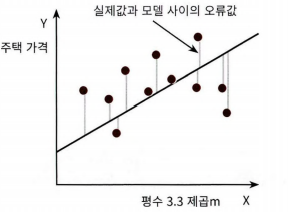

- 오류값은 +나 -가 될 수 있음
- 절댓값 취해서 더하거나, 오류 값의 제곱을 구해 더함 (RSS)
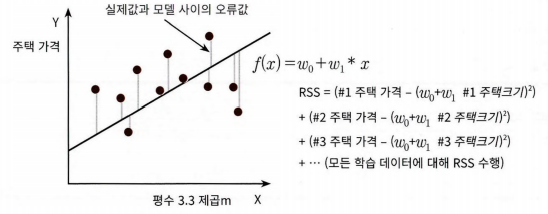

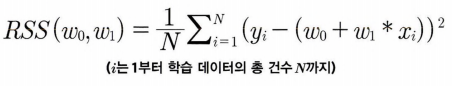

- RSS 비용함수
- 비용함수 = 손실값


---

## 03 비용 최소화하기 - 경사 하강법 소개
- 경사 하강법: 고차원 방정식에
대한 문제를 해결해 주면서 비용 함수 RSS를 최소화하는 방법을 직관적으로 제공하는 뛰어난 방식
- ‘점진적으로’ 반복적인 계산을 통해 w 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 W 파라미터를 구하는 방식
- 반복적으로 비용 함수의 반환 값, 즉 예측값과 실제 값의 차이가 작아지는 방향성을 가
지고 W 파라미터를 지속해서 보정해 나감
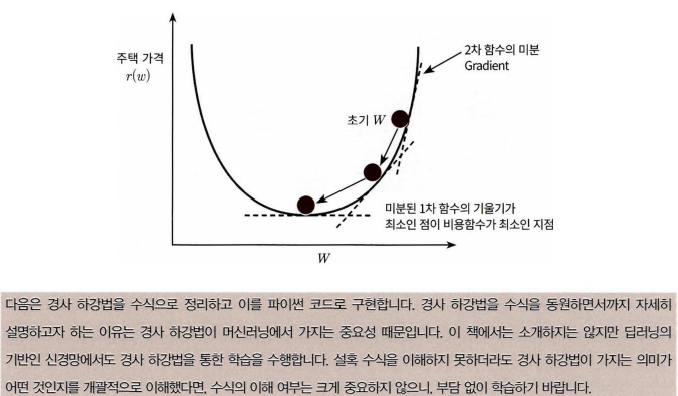

- R(w)는 구대의 파라미터 w0, w1을 각각 가지고 있기 때문에 일반적인 미분을 적용할 수 없고 각 변수에 편미분 적용
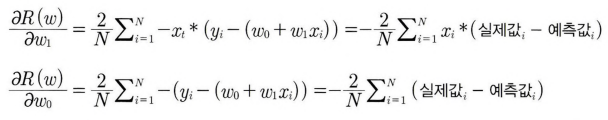

- 위 편미분 값이 너무 클 수 있기 떄문에 보정계수를 곱하는데 이를 학습률이라고 함

- Step 1： w1,w0를 임의의 값으로 설정하고 첫 비용 함수의 값을 계산
- Step 2： w1, w0을 업데이트한 후 다
시 비용 함수의 값을 계
- Step 3： 비용 함수가 감소하는 방향성으로 주어진 횟수만큼 Step 2를 반복하면서 계속 업데이트

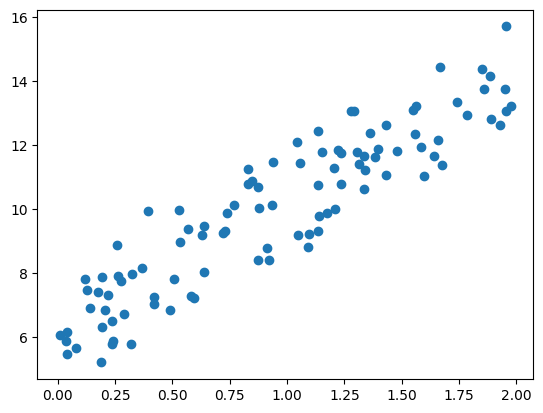

In [1]:
# 회귀식 y = 4x + 6을 근사하기 위한 100개의 데이터 세트 만들고 경사하강법을 이용해 회귀 계수 w1, w2 도출
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y =4x + 6을 근사 (w1=4, w0=6), 임의의 값은 노이즈를 위해 만듦
X = 2 * np.random.rand(100,1)
y = 6 + 4 * X + np.random.randn(100,1)

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X,y)

- 데이터는 y = 4x + 6 을 중심으로 무작위로 퍼져 있음

In [2]:
# 비용 함수 정의
def get_cost(y, y_pred) :
    N = len(y)
    cost = np.sum(np.square( y - y_pred )) / N
    return cost

- 경사하강법 gradient_descent() 함수 이용해 구현

- gradient_descent() : w1과 w0을 모두 0으로 초기화한 뒤 iters 개수만큼 반복하면서 w1과 w0을 업데이트함

- get_weight_updates(): 입력 배열 x값에 대한 예측 배열 y_pred는 np.dot(X, w1.T) + w0으로 구현

- 예측값 = w0 + X(1)w1 + X(2)w1 + ... + X(100)*w1 = X * w1 이고 이는 입력배열 X와 w1 배열의 내적과 동일


In [3]:
# w1과 w0을 업데이트할 w1_update, w0_update를 반환
def get_weight_updates(w1, w0, X, y, learning_rate = 0.01) :
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    #예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred

    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1 값을 가진 행렬 생성
    w0_factors = np.ones((N,1))

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

    return w1_update, w0_update

In [4]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0을 업데이트 적용함
def gradient_descent_steps(X, y, iters=10000) :
    # w0과 w1을 모두 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행
    for ind in range(iters) :
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

In [5]:
# w1과 w0 구해보기
# 최종적으로 예측값과 실제값 사이의 RSS 차이를 계산하는 get_cost() 함수 생성하고 경사 하강법의 예측 오류 계산
def get_cost(y, y_pred) :
    N = len(y)
    cost = np.sum(np.square(y - y_pred)) / N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters = 1000)
print('w1:{0:.3f} w0:{1:.3f}'.format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost: {0:.4f}'.format(get_cost(y,y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost: 0.9935


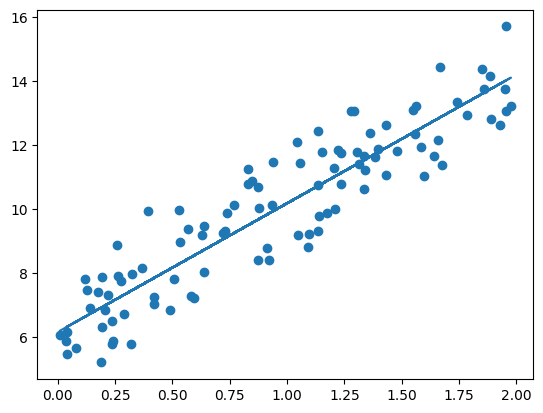

In [6]:
# 회귀선 그려보기
plt.scatter(X, y)
plt.plot(X, y_pred)

- 경사 하강법은 모든 학습 데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트하기 때문에 수행 시간이 매우 오
래 걸림
- 실전: 확률적 경사 하강법
- 일부 데이터만 이용해 피가 업데이트되는 값을 계산하므로 경사 하강법에 비해서 빠른
속도
-  확률적 경사 하강법이나 미니 배치 확률
적 경사 하강법을 이용해 최적 비용함수를 도출
- 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 이를 기반으로 wl_update, w0_update를 계산하는 부분만
차이가 있음

In [7]:
def stochastic_gradient_descent_steps(X, y, batch_size = 10, iters=1000) :
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    for ind in range(iters) :
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size 만큼 데이터를 추출해서 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이터
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate = 0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

In [8]:
# 예측 오류 비용 계산
w1, w0 = stochastic_gradient_descent_steps(X, y, iters = 1000)
print('w1:', round(w1[0,0], 3), 'w0:', round(w0[0,0], 3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost: {0:4f}'. format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost: 0.993711


- 별 차이 없으므로 일반적으로 확률적 경사 하강법 이용


- 피처가 여러개인 경우 회귀계수 도출
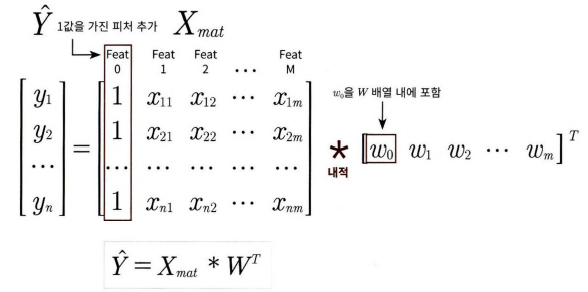



---

## 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측
### LInearRegressiom 클래스 - Ordinary Least Squares
- 예측값과 실제 값의 RSS 최소화해
OLS추정 방식으로 구현한 클래스
- fit() 메서드로 X, y 배열을 입력받으면 회귀 계수인 W를 coef_속성에 저장


class sklearn.linear_model.LinearRegression(fit_intercept = True, normalize = False, copy_X = True, n_jobs = 1)

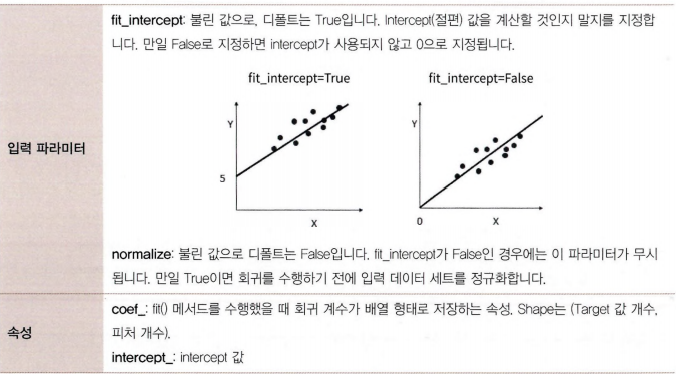

- 입력피처의 독립성에 많은 영향 받음
- 피처 간의 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 마우 민감 -> 다중 공선성 문제
- 상관관계가 높은 피처가 많은 경우 독립적인 중요한 피터만 남기고 제거하거나 규제 적용
- PCA를 통해 차원 축소 수행 고려 가능


---

### 회귀 평가 지표
- 오류의 절댓값 평균이나 제곱, 또는 제곱한 뒤 다시 루트를 씌운 평균값
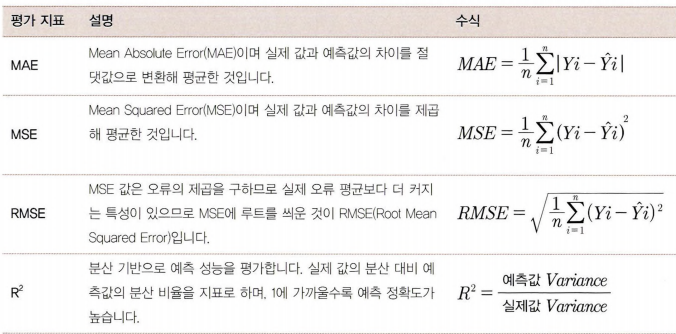

- 사이킷런은 RMSE 제공 안함 -> 직접 만들어야 함
- scoring 파라미터 적용 값

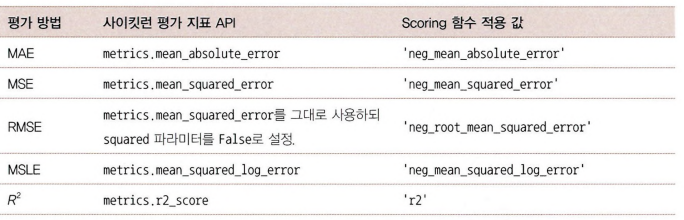

유의할점
- 'neg_': 음수값을 가진다는 의미, MAE는 절댓값의 합이기 때문에 음수가 될 수 없음
-  사이킷런의 Scoring 함수에 일반적으로 반영하려면 보정이 필요

 ### LinearRegression을 이용해 보스턴 주택 가격 회귀 구현
 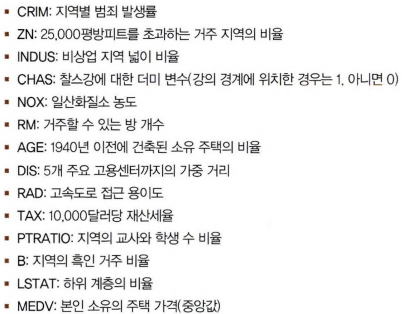

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# boston 데이터 세트 로드
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston')

# boston 데이터 세트 DataFrame으로 변환
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

# boston 데이터 세트의 target 배열은 주택 가격임. 이를 PRICE 칼럼으로 DataFrame에 추가함
bostonDF['PRICE'] = boston.target
print('Boston 데이터 세트 크기:', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


-> Null 값 없고 모두 float형
- 8개 칼럼에 대해 값이 증가할수록 Price 값이 어떻게 변하는지 확인
- 사본의 regplot()함수는 X,Y 축 값의 산점도와 함께 선형 회귀 직선 그림
- marplotlib.subplot()을 이용해 각 ax 마다 칼럼과 Price의 관계 표현
- matplotlib의 subplots()은 여러개의 그래프를 한번에 표현하기 위해 자주 사용
- ncols는 열방향으로 위치할 그래프의 개수, nrows는 행 방향으로 위치할 그래프의 개수


In [15]:
# CHAS와 RAD를 float 형으로 변환
bostonDF['CHAS']=bostonDF['CHAS'].astype(np.float64)
bostonDF['RAD']=bostonDF['RAD'].astype(np.float64)

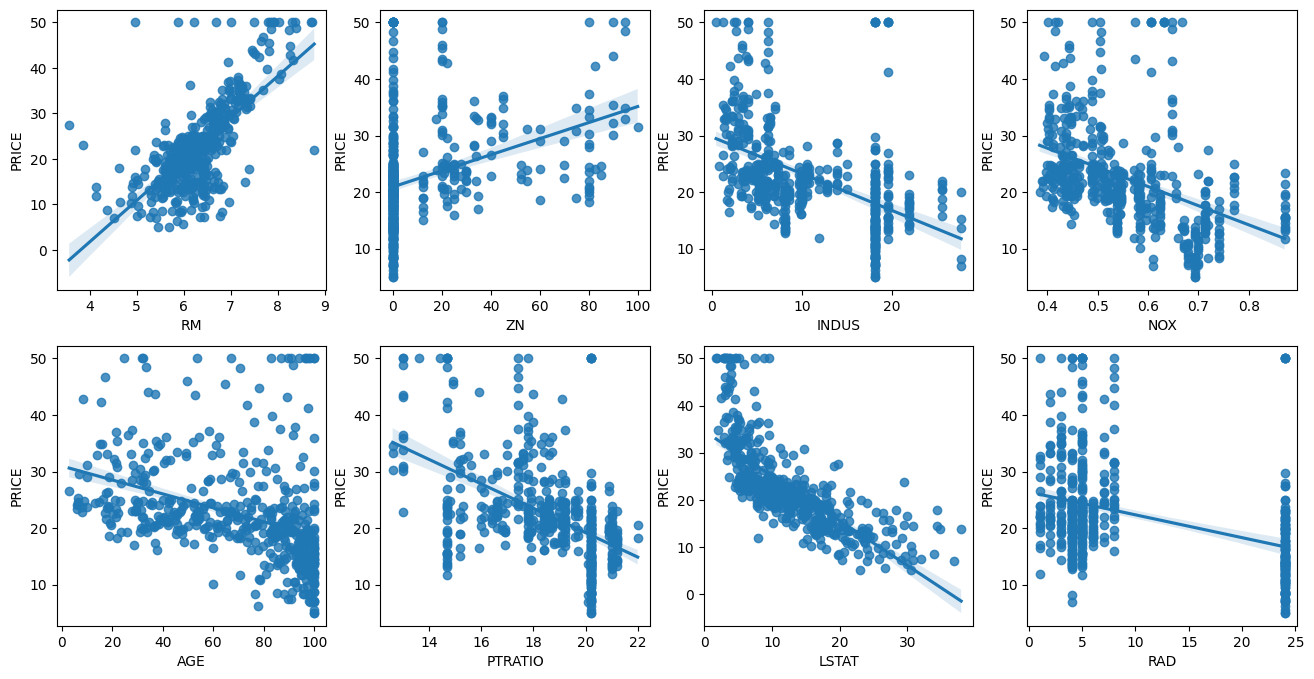

In [16]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
  row = int(i/4)
  col = i%4
  # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
  sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

- RM과 LSYAY의 PRICE 영향도가 가장 두드러지게 나타남
- RM은 양 방향의 선형성이 가장 큼
- LSTAT는 음방향의 선형성이 가장 큼


In [17]:
# LinearRegression 클래스를 이용해 보스턴 주택 가격의 회귀 모델
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# 선형 회귀 OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [18]:
print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_,1))

절편 값: 40.995595172164826
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [19]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_,1), index=X_data.columns)
coeff.sort_values(ascending=False)

,0
RM,3.4
CHAS,3.0
RAD,0.4
ZN,0.1
INDUS,0.0
B,0.0
TAX,-0.0
AGE,0.0
CRIM,-0.1
LSTAT,-0.6


- RM이 양의 값으로 회귀계수가 가장 크며, NOX 피처의 회귀 계수 - 값이 너무 커 보임. 차츰 최적화를 수행하면서 피처 coefficients의 변화도 살펴보기
- 5개의 폴드 세트에서 cross_val_score()을 이용해 교차검증으로 MSE와 RMSE를 측정
- 사이킷런의 metric 평가 기준에 MSE를 부합시키기 위해서 scoring：1 neg_mean_squared_
error'로 사이킷런의 Scoring 함수를 호출하면 모델에서 계산된 MSE 값에 -1을 곱해서 반환

In [20]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score()로 5 폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring='neg_mean_squared_error)로 반환된 값은 모두 음수
print('5 folds의 개별 Negative MSE scores : ', np.round(neg_mse_scores,2))
print('5 folds의 개별 RMSE scores : ', np.round(rmse_scores,2))
print('5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores :  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE : 5.829


## 05 다항 회귀와 과(대)적합/과소적합 이해
### 다항 회귀 이해
- 다항회귀는 선형 회귀
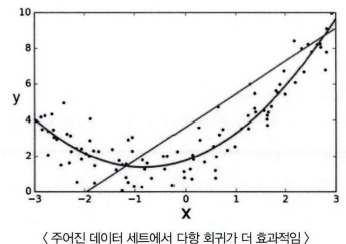

- PolynomialFeatures클래스를 통해 피처를 다항식 피처로 변환
- degree 파라미터를 통해 입력받은 단항식 피처를 degree에 해당하는 다항식 피처로 변환


In [21]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1], [2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n', X)

# degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [22]:
def  polynomial_func(X):
  y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature: \n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


In [23]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n', poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수 \n', np.round(model.coef_,2))
print('Polynomial 회귀 Shape:', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape: (10,)


In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def  polynomial_func(X):
  y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
  return y

# Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X,y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_,2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 다항 회귀를 이용한 과소적합 및 과적합 이해


In [25]:
# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
def true_fun(X):
  return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터입니다
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값입니다
y = true_fun(X) + np.random.randn(n_samples) * 0.1


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE 는 0.4077289625098685 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE 는 0.04320874987232064 입니다.

Degree 15 회귀 계수는 [-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08] 입니다.
Degree 15 MSE 는 181238256.56423894 입니다.


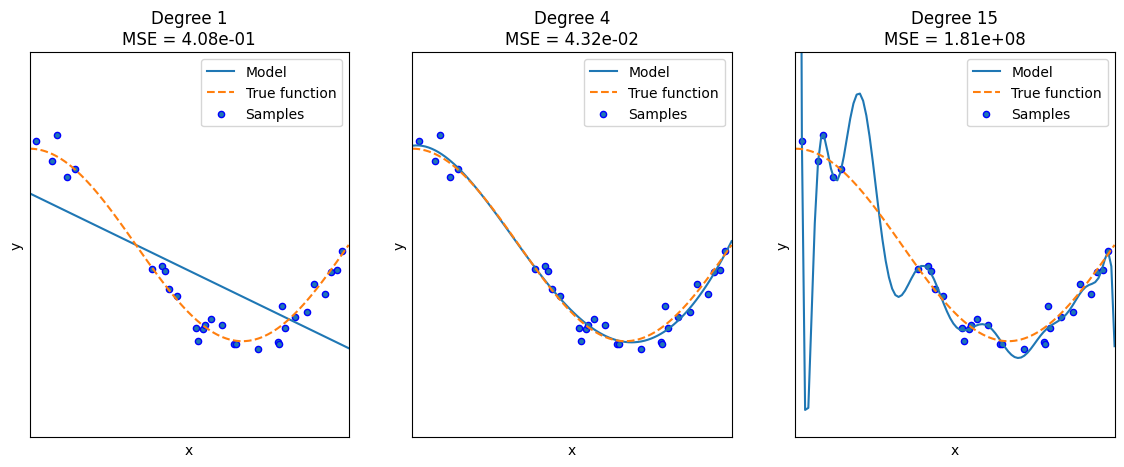

In [26]:
plt.figure(figsize=(14,5))
degrees = [1,4,15]

# 다항 회귀의 차수(degree)를 1,4,15로 각각 변화시키면서 비교
for i in range(len(degrees)):
  ax = plt.subplot(1, len(degrees), i + 1)
  plt.setp(ax, xticks=(), yticks=())

  # 개별 degree 별로 Polynomial 변환
  polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
  linear_regression = LinearRegression()
  pipeline = Pipeline([('polynomial_features', polynomial_features), ('linear_regression', linear_regression)])
  pipeline.fit(X.reshape(-1,1),y)

  # 교차 검증으로 다항 회귀를 평가
  scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring = 'neg_mean_squared_error', cv=10)
  # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
  coefficients = pipeline.named_steps['linear_regression'].coef_
  print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
  print('Degree {0} MSE 는 {1} 입니다.'.format(degrees[i], -1 * np.mean(scores)))

  # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행
  # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교
  X_test = np.linspace(0, 1, 100)
  # 예측값 곡선
  plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label='Model')
  # 실제값 곡선
  plt.plot(X_test, true_fun(X_test), '--', label='True function')
  plt.scatter(X, y, edgecolor='b', s=20, label='Samples')

  plt.xlabel('x')
  plt.ylabel('y')
  plt.xlim((0,1))
  plt.ylim((-2,2))
  plt.legend(loc='best')
  plt.title('Degree {}\nMSE = {:.2e}'.format(degrees[i], -scores.mean(), scores.std()))

plt.show()

- 맨 왼쪽의 Degree 1 예측 곡선은 단순한 직선으로서 단순 선형 회귀와 똑같습니다. 실제 데이터 세트인 코사인 데이터 세
트를 직선으로 예측하기에는 너무 단순해 보입니다. 예측 곡선이 학습 데이터의 패턴을 제대로 반영하지 못하고 있는 과소
적합 모델이 되었습니다. MSE 값은 약 0.41 입니다.
- 가운데 Degree 4 예측 곡선은 실제 데이터 세트와 유사한 모습입니다. 변동하는 잡음까지 예측하지는 못했지만, 학습 데
이터 세트를 비교적 잘 반영해 코사인 곡선 기반으로 테스트 데이터를 잘 예측한 곡선을 가진 모델이 되었습니다. MSE 값
은 약 0.04로 가장 뛰어난 예측 성능을 나타내고 있습니다.
- 맨 오른쪽 Degree 15 예측 곡선은 MSE 값이 182581084.83이 될 정도로 어처구니없는 오류 값이 발생했습니다(물론 과
적합을 강조하기 위해 Degree를 매우 높은 차수인 15로 설정한 결과입니다). 예측 곡선을 보면 데이터 세트의 변동 잡음
값까지 지나치게 반영한 결과, 예측 곡선이 학습 데이터 세트만 정확히 예측하고, 테스트 값의 실제 곡선과는 완전히 다른
형태의 예측 곡선이 만들어졌습니다. 결과적으로 학습 데이터에 너무 충실하게 맞춘 과적합이 심한 모델이 되었고 어이없
는 수준의 높은 MSE 값이 나왔습니다.

### 편향-분산 트레이드오프
고편향: 지나치게 한 방향성으로 치우친 경행
고분산: 학습 데이터 하나하나의 특성을 반영하면서 매우 복잡한 모델이 되었고 지나치게 높은 변동성으로 가지게 됨
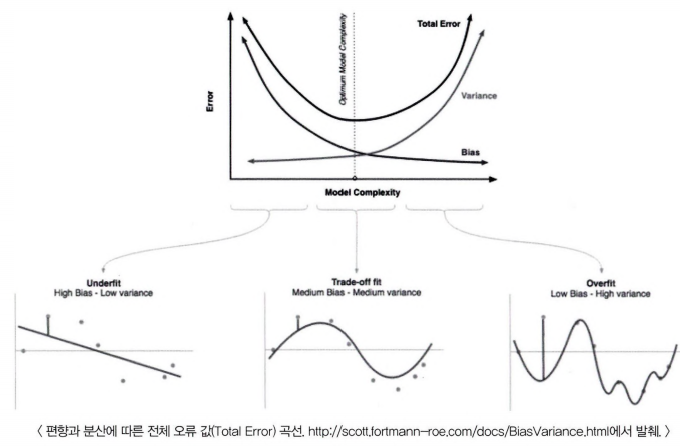